Part 1: 

●	Load the data using Python Pandas library.

●	Do Exploratory Data Analysis of the data and state your insights.

Part 2: 

●	Perform Multiple Regression Model.

●	Perform the regularization techniques – Lasso, Ridge, Elastic-Net

●	Provide the inferences for all various Techniques Performed.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import pylab
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import sequential_feature_selector
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [35]:
# Load the data using Python Pandas library.
df = pd.read_csv('Automobile.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
symboling              201 non-null int64
normalized_losses      201 non-null int64
make                   201 non-null object
fuel_type              201 non-null object
aspiration             201 non-null object
number_of_doors        201 non-null object
body_style             201 non-null object
drive_wheels           201 non-null object
engine_location        201 non-null object
wheel_base             201 non-null float64
length                 201 non-null float64
width                  201 non-null float64
height                 201 non-null float64
curb_weight            201 non-null int64
engine_type            201 non-null object
number_of_cylinders    201 non-null object
engine_size            201 non-null int64
fuel_system            201 non-null object
bore                   201 non-null float64
stroke                 201 non-null float64
compression_ratio      201 non-nu

In [6]:
# Do Exploratory Data Analysis of the data and state your insights.
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,125.189055,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.329701,3.261741,10.164279,103.263682,5121.393035,25.179104,30.686567,13207.129353
std,1.254802,33.572966,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268166,0.317875,4.004965,37.389372,479.624905,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [36]:
num_cols = []
cat_cols = []

for i in df.columns[:]:
    if(df[i].dtype=='object'):
        cat_cols.append(i)
    else:
        num_cols.append(i)
        
print(num_cols)
print(cat_cols)

['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
['make', 'fuel_type', 'aspiration', 'number_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'number_of_cylinders', 'fuel_system']


[]

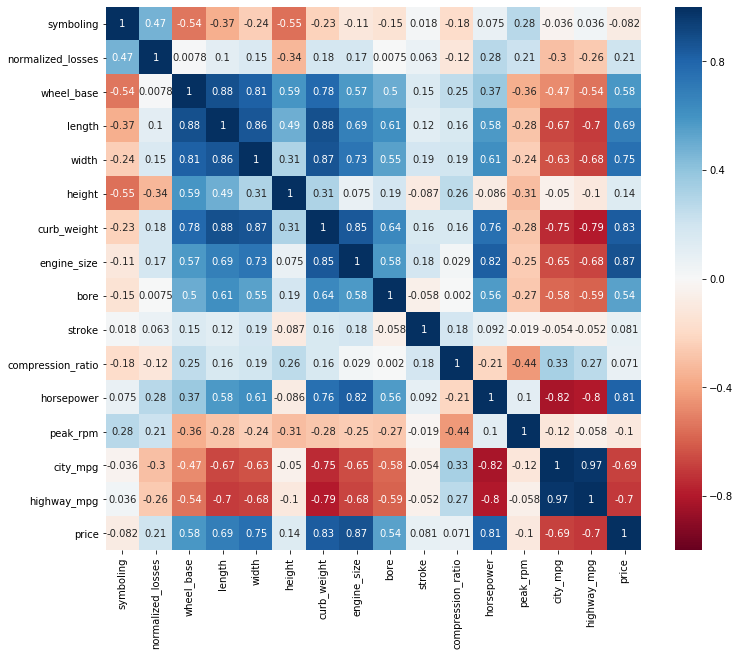

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.plot()

In [37]:
df = df.drop(['make','height', 'stroke', 'compression_ratio', 'peak_rpm', 'number_of_doors'], axis=1)
df.head()

for i in ['height', 'stroke', 'compression_ratio', 'peak_rpm']:
    num_cols.remove(i)
    


In [38]:

for i in ['make','number_of_doors']:
    cat_cols.remove(i)


In [39]:
df.number_of_cylinders.replace({'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3},inplace=True)

In [40]:
df=pd.get_dummies(df,columns=cat_cols,dummy_na=False,drop_first=True)
df.head()

,symboling,normalized_losses,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,city_mpg,...,number_of_cylinders_6,number_of_cylinders_8,number_of_cylinders_12,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,168,88.6,168.8,64.1,2548,130,3.47,111,21,...,0,0,0,0,0,0,0,1,0,0
1,3,168,88.6,168.8,64.1,2548,130,3.47,111,21,...,0,0,0,0,0,0,0,1,0,0
2,1,168,94.5,171.2,65.5,2823,152,2.68,154,19,...,1,0,0,0,0,0,0,1,0,0
3,2,164,99.8,176.6,66.2,2337,109,3.19,102,24,...,0,0,0,0,0,0,0,1,0,0
4,2,164,99.4,176.6,66.4,2824,136,3.19,115,18,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# RFE
y=df['price']
X=df.drop(['price'],axis=1)
model=LinearRegression()
rfe=RFE(model,10)
X_rfe=rfe.fit_transform(X,y)
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
print(X.columns)

[False False False False False False False  True False False False False
 False False False False False False False  True False False  True  True
  True False False  True  True  True  True False  True False False False
 False False]
[24 27 25 28 11 29 23  1 26 18 20 22  2  3  5  7  6  4 16  1  9  8  1  1
  1 19 10  1  1  1  1 15  1 21 12 17 13 14]
Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'curb_weight', 'engine_size', 'bore', 'horsepower', 'city_mpg',
       'highway_mpg', 'fuel_type_gas', 'aspiration_turbo',
       'body_style_hardtop', 'body_style_hatchback', 'body_style_sedan',
       'body_style_wagon', 'drive_wheels_fwd', 'drive_wheels_rwd',
       'engine_location_rear', 'engine_type_l', 'engine_type_ohc',
       'engine_type_ohcf', 'engine_type_ohcv', 'engine_type_rotor',
       'number_of_cylinders_3', 'number_of_cylinders_4',
       'number_of_cylinders_5', 'number_of_cylinders_6',
       'number_of_cylinders_8', 'number_of_cylinders_12',

In [42]:
#Select  the best number to keep in RFE

no_of_cols=44
score_list=[]

for n in range(no_of_cols):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    model=LinearRegression()
    rfe=RFE(model,n+1)
    X_train_rfe=rfe.fit_transform(X_train,y_train)
    X_test_rfe=rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score=model.score(X_test_rfe,y_test)
    score_list.append(score)

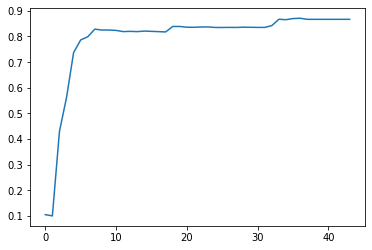

In [43]:
plt.plot(score_list)

In [44]:
score_list

[0.10477964131723427,
 0.09983464781327855,
 0.42898194895970104,
 0.5613120938632478,
 0.7364818063038873,
 0.7856951516594823,
 0.7983150888105056,
 0.8277531208433586,
 0.8243786945032913,
 0.8243235134695024,
 0.822954796761686,
 0.8183026909709132,
 0.8191667886701379,
 0.8182404612876362,
 0.8202901720671366,
 0.819219552467371,
 0.8181168858352604,
 0.8169260681099375,
 0.8382530102694897,
 0.8382811097008593,
 0.8352832241075807,
 0.8351451165172553,
 0.8361350425595434,
 0.8365142799105273,
 0.834378967217617,
 0.8343789672176176,
 0.834585225215979,
 0.8344613806773924,
 0.8354791137592104,
 0.8350332013826997,
 0.8346416045344269,
 0.8346070112254594,
 0.8416309144802235,
 0.866315651198255,
 0.8647169837559143,
 0.8690666582117899,
 0.8703198418073628,
 0.8660845327720534,
 0.8660845327720534,
 0.8660845327720534,
 0.8660845327720534,
 0.8660845327720534,
 0.8660845327720534,
 0.8660845327720534]

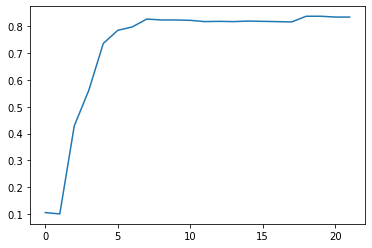

In [45]:
no_of_cols=22
score_list=[]

for n in range(no_of_cols):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    model=LinearRegression()
    rfe=RFE(model,n+1)
    X_train_rfe=rfe.fit_transform(X_train,y_train)
    X_test_rfe=rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score=model.score(X_test_rfe,y_test)
    score_list.append(score)
plt.plot(score_list)

In [46]:
cols=X.columns
model=LinearRegression()
rfe=RFE(model,22)
X_rfe=rfe.fit_transform(X,y)
model.fit(X_rfe,y)
temp=pd.Series(rfe.support_,index=cols)
selected_feature_rfe=temp[temp==True].index
print(selected_feature_rfe)

Index(['width', 'bore', 'aspiration_turbo', 'body_style_hardtop',
       'body_style_hatchback', 'body_style_sedan', 'body_style_wagon',
       'drive_wheels_fwd', 'engine_location_rear', 'engine_type_l',
       'engine_type_ohc', 'engine_type_ohcf', 'engine_type_ohcv',
       'engine_type_rotor', 'number_of_cylinders_4', 'number_of_cylinders_5',
       'number_of_cylinders_6', 'number_of_cylinders_8',
       'number_of_cylinders_12', 'fuel_system_4bbl', 'fuel_system_mfi',
       'fuel_system_spdi'],
      dtype='object')


In [47]:
# polynomial regression
y=df['price']
X=df.drop(['price'],axis=1)
pf=PolynomialFeatures()
x=pf.fit_transform(X)
list=pf.get_feature_names(X.columns)
x=pd.DataFrame(x,columns=list)
x.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 780 columns):
1                                               float64
symboling                                       float64
normalized_losses                               float64
wheel_base                                      float64
length                                          float64
width                                           float64
curb_weight                                     float64
engine_size                                     float64
bore                                            float64
horsepower                                      float64
city_mpg                                        float64
highway_mpg                                     float64
fuel_type_gas                                   float64
aspiration_turbo                                float64
body_style_hardtop                              float64
body_style_hatchback                            float6

In [48]:
lin_reg=sm.OLS(y,X)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     57.29
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.98e-75
Time:                        23:17:40   Log-Likelihood:                -1827.7
No. Observations:                 201   AIC:                             3729.
Df Residuals:                     164   BIC:                             3852.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
symboling                -59

In [49]:
# Backward elimination
cols=X.columns.to_list()
pmax=1

while (len(cols)>0):
    p=[]
    X_1=X[cols]
    model=sm.OLS(y,X_1).fit()
    p=pd.Series(model.pvalues.values,index=cols)
    pmax=max(p)
    feature_max_p=p.idxmax()
    if pmax>0.05:
        cols.remove(feature_max_p)
    else:
        break
selected_features_be=cols
print(selected_features_be)

['normalized_losses', 'wheel_base', 'curb_weight', 'horsepower', 'fuel_type_gas', 'body_style_hardtop', 'body_style_hatchback', 'body_style_sedan', 'body_style_wagon', 'engine_location_rear', 'engine_type_ohc', 'engine_type_ohcf', 'engine_type_ohcv', 'engine_type_rotor', 'number_of_cylinders_3', 'number_of_cylinders_4', 'number_of_cylinders_5', 'number_of_cylinders_6', 'number_of_cylinders_12', 'fuel_system_spdi']


In [50]:
X=X[selected_features_be]
model=sm.OLS(y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              408.5
Date:                Wed, 23 Oct 2019   Prob (F-statistic):                   3.77e-139
Time:                        23:18:20   Log-Likelihood:                         -1838.2
No. Observations:                 201   AIC:                                      3716.
Df Residuals:                     181   BIC:                                      3783.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [51]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
model=sm.OLS(y_train,X_train).fit()
print(model.rsquared)

0.9854431360744975


In [53]:
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print('r2 score: ',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mse))

r2 score:  0.8749429562747075
RMSE 3365.6139794022533


In [54]:
#Lasso Regression
lasso=Lasso(alpha=0.1)
lasso.fit(X,y)
pd.DataFrame(lasso.coef_,X.columns,columns=['coefs'])

,coefs
normalized_losses,14.240679
wheel_base,157.558690
curb_weight,5.916097
horsepower,68.366844
fuel_type_gas,-1661.751976
body_style_hardtop,-3662.786611
body_style_hatchback,-3646.956688
body_style_sedan,-3102.330862
body_style_wagon,-4760.393332
engine_location_rear,9134.537492


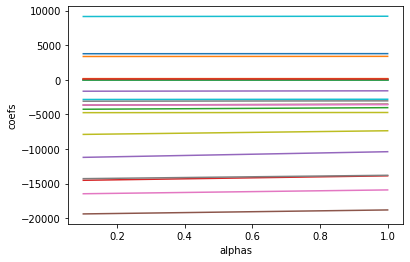

In [55]:
n_alphas=50
alphas=np.linspace(0.1,1,n_alphas)
coefs=[]
model=Lasso()

for a in alphas:
    model.set_params(alpha=a)
    model.fit(X,y)
    coefs.append(model.coef_)

plt.plot(alphas,coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

The Chart shows that as alpha increases it is setting many coefficients is zero.However, we dont know optimal alpha.

In [57]:
# Let's tune the Lasso regresion and find the optimal alpha

n_alphas=50
alphas=np.linspace(0.1,1,n_alphas)

lasso_cv=LassoCV(alphas=alphas,cv=3,random_state=22)
lasso_cv.fit(X,y)

LassoCV(alphas=array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.46734694, 0.48571429, 0.50408163, 0.52244898, 0.54081633,
       0.55918367, 0.57755102, 0.59591837, 0.61428571, 0.63265306,
       0.65102...
       0.74285714, 0.76122449, 0.77959184, 0.79795918, 0.81632653,
       0.83469388, 0.85306122, 0.87142857, 0.88979592, 0.90816327,
       0.92653061, 0.94489796, 0.96326531, 0.98163265, 1.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=22, selection='cyclic', tol=0.0001,
        verbose=False)

In [58]:
lasso_cv.alpha_

1.0

In [59]:
lasso=Lasso(alpha=1.0)
lasso.fit(X,y)
pd.DataFrame(lasso.coef_,X.columns,columns=['coefs'])

,coefs
normalized_losses,14.275353
wheel_base,159.905310
curb_weight,5.976686
horsepower,67.768794
fuel_type_gas,-1603.975199
body_style_hardtop,-3533.470422
body_style_hatchback,-3606.688323
body_style_sedan,-3053.312306
body_style_wagon,-4736.023706
engine_location_rear,9172.263551


In [68]:
#Ridge Regression
ridge=Ridge(alpha=0.5)
ridge.fit(X,y)
pd.DataFrame(ridge.coef_,X.columns,columns=['coefs'])

,coefs
normalized_losses,13.792409
wheel_base,200.484099
curb_weight,6.201810
horsepower,68.741184
fuel_type_gas,-1221.426258
body_style_hardtop,-2574.423375
body_style_hatchback,-3835.821435
body_style_sedan,-3207.477049
body_style_wagon,-5140.158884
engine_location_rear,8051.954234


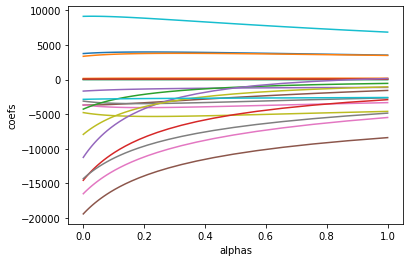

In [69]:
n_alphas=50
alphas=np.logspace(-3,0,n_alphas)
coefs=[]
model=Ridge()

for a in alphas:
    model.set_params(alpha=a)
    model.fit(X,y)
    coefs.append(model.coef_)

plt.plot(alphas,coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [70]:
n_alphas=1000
alphas=np.logspace(-2,0)

ridge_cv=RidgeCV(alphas=alphas,store_cv_values=True)
ridge_cv.fit(X,y)

ridge_cv.alpha_

0.16768329368110074

In [71]:
ridge=Ridge(alpha=0.16768329368110074)
ridge.fit(X,y)
pd.DataFrame(ridge.coef_,X.columns,columns=['coefs'])

,coefs
normalized_losses,14.611661
wheel_base,192.958282
curb_weight,6.085614
horsepower,67.484086
fuel_type_gas,-1397.187033
body_style_hardtop,-3434.924645
body_style_hatchback,-4047.902281
body_style_sedan,-3475.218817
body_style_wagon,-5309.370839
engine_location_rear,8947.231426


In [72]:
#Elastic Net
enet=ElasticNet(alpha=0.1)
enet.fit(X,y)
pd.DataFrame(enet.coef_,X.columns,columns=['coefs'])

,coefs
normalized_losses,4.456947
wheel_base,117.731803
curb_weight,6.070427
horsepower,85.579439
fuel_type_gas,-863.071783
body_style_hardtop,839.968295
body_style_hatchback,-1264.285167
body_style_sedan,-330.550574
body_style_wagon,-1894.381495
engine_location_rear,2015.783589


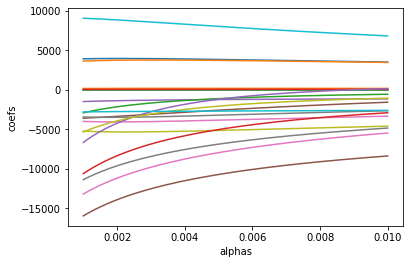

In [73]:
n_alphas=200
alphas=np.logspace(-3,-2,n_alphas)
coefs=[]
model=ElasticNet()

for a in alphas:
    model.set_params(alpha=a)
    model.fit(X,y)
    coefs.append(model.coef_)

plt.plot(alphas,coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [74]:
n_alphas=2000
alphas=np.logspace(-3,1,n_alphas)

en_cv=ElasticNetCV(alphas=alphas,cv=3)
en_cv.fit(X,y)
en_cv.alpha_

0.06837816765482602

In [75]:
enet=ElasticNet(alpha=0.06837816765482602)
enet.fit(X,y)
pd.DataFrame(enet.coef_,X.columns,columns=['coefs'])

,coefs
normalized_losses,5.532513
wheel_base,127.697461
curb_weight,6.088057
horsepower,83.299440
fuel_type_gas,-935.578602
body_style_hardtop,768.154025
body_style_hatchback,-1520.102632
body_style_sedan,-613.211750
body_style_wagon,-2293.870767
engine_location_rear,2619.763901
